In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/kaggle/input/meteorites-dataset/meteorites.csv')

In [3]:
data.head()

,name,id,name_type,class,mass,fall,year,lat,long,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
data.tail()

,name,id,name_type,class,mass,fall,year,lat,long,geolocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   name_type    45716 non-null  object 
 3   class        45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   lat          38401 non-null  float64
 8   long         38401 non-null  float64
 9   geolocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [6]:
print("Dataset shape:", data.shape)

Dataset shape: (45716, 10)


In [7]:
data.keys()

Index(['name', 'id', 'name_type', 'class', 'mass', 'fall', 'year', 'lat',
       'long', 'geolocation'],
      dtype='object')

In [8]:
data['name_type'].value_counts()

name_type
Valid     45641
Relict       75
Name: count, dtype: int64

In [9]:
data['name'].value_counts()

name
Aachen                    1
Northwest Africa 7459     1
Northwest Africa 7404     1
Northwest Africa 7407     1
Northwest Africa 7408     1
                         ..
Grove Mountains 052250    1
Grove Mountains 052253    1
Grove Mountains 052254    1
Grove Mountains 052256    1
Zulu Queen                1
Name: count, Length: 45716, dtype: int64

In [10]:
data = data.drop(['id','geolocation'], axis=1)
data.head()

,name,name_type,class,mass,fall,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [11]:
n_samples, n_features = data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 45716
Number of features: 8


In [12]:
data.isnull().sum()

name            0
name_type       0
class           0
mass          131
fall            0
year          291
lat          7315
long         7315
dtype: int64

In [13]:
data['lat'].fillna(data['lat'].mean(), inplace=True)
data['long'].fillna(data['long'].mean(), inplace=True)
data['mass'].fillna(data['mass'].mean(), inplace=True)
data['year'].fillna(data['year'].mean(), inplace=True)

In [14]:
data.isnull().sum()

name         0
name_type    0
class        0
mass         0
fall         0
year         0
lat          0
long         0
dtype: int64

In [15]:
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(data)

Dataset has 8 features and 45716 examples.


,Unique,Missing,Duplicated,Types
name,45716,0,0,object
name_type,2,0,0,object
class,455,0,0,object
mass,12577,0,0,float64
fall,2,0,0,object
year,266,0,0,float64
lat,12739,0,0,float64
long,14641,0,0,float64


In [16]:
data.describe(include=object)

,name,name_type,class,fall
count,45716,45716,45716,45716
unique,45716,2,455,2
top,Aachen,Valid,L6,Found
freq,1,45641,8339,44609


In [17]:
data.duplicated().sum()

0

In [18]:
'''plt.figure(figsize = (6,6))
plt.pie(data['year'].value_counts(), startangle = 90, autopct = '%.1f', shadow = True)
plt.show() '''

"plt.figure(figsize = (6,6))\nplt.pie(data['year'].value_counts(), startangle = 90, autopct = '%.1f', shadow = True)\nplt.show() "

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col1 = ['name', 'class', 'name_type', 'fall']
data[col1] = data[col1].apply(LabelEncoder().fit_transform)
print(data)

        name  name_type  class      mass  fall    year       lat       long
0          0          1    319      21.0     0  1880.0  50.77500    6.08333
1          1          1    185     720.0     0  1951.0  56.18333   10.23333
2          5          1     82  107000.0     0  1952.0  54.21667 -113.00000
3          9          1      0    1914.0     0  1976.0  16.88333  -99.90000
4        405          1    324     780.0     0  1902.0 -33.16667  -64.95000
...      ...        ...    ...       ...   ...     ...       ...        ...
45711  45632          1    100     172.0     1  1990.0  29.03700   17.01850
45712  45633          1    424      46.0     1  1999.0  13.78333    8.96667
45713  45634          1    171       3.3     1  1939.0  49.25000   17.66667
45714  45638          1    324    2167.0     1  2003.0  49.78917   41.50460
45715  45639          1    298     200.0     1  1976.0  33.98333 -115.68333

[45716 rows x 8 columns]


In [20]:
data.head()

,name,name_type,class,mass,fall,year,lat,long
0,0,1,319,21.0,0,1880.0,50.77500,6.08333
1,1,1,185,720.0,0,1951.0,56.18333,10.23333
2,5,1,82,107000.0,0,1952.0,54.21667,-113.00000
3,9,1,0,1914.0,0,1976.0,16.88333,-99.90000
4,405,1,324,780.0,0,1902.0,-33.16667,-64.95000


Text(0.5, 0, 'Class')

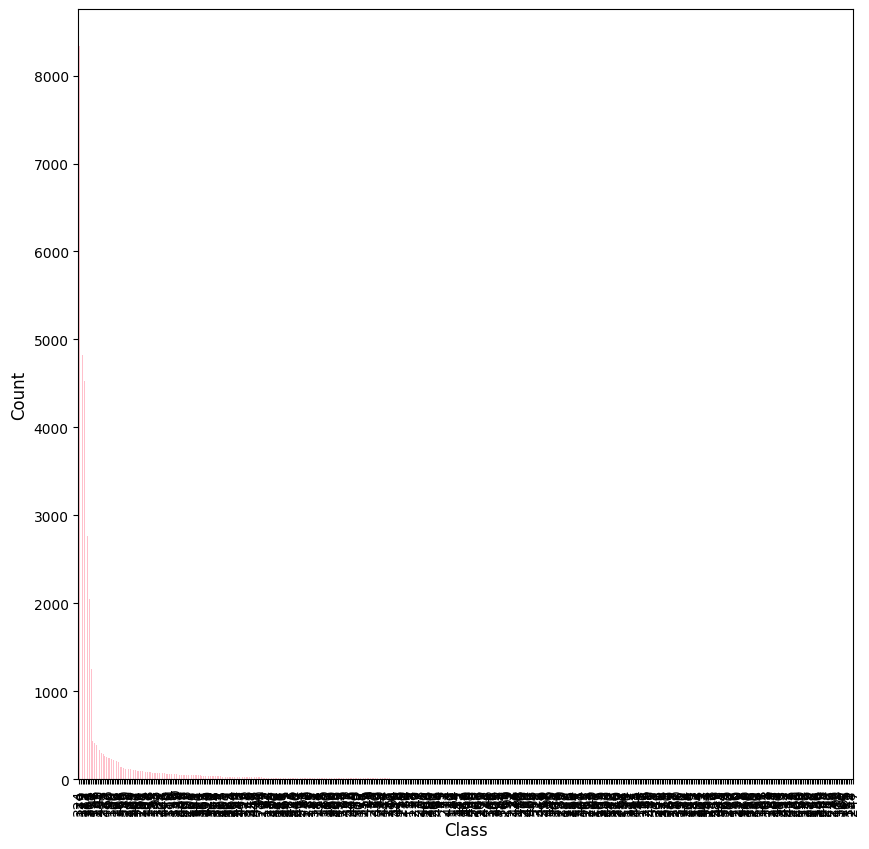

In [21]:
data['class'].value_counts().plot(kind='bar', figsize=(10,10), color='pink')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)

 -5000 fazla ise %70  
 -1000-5000 arasinda en fazla %55  
 -400-4500 arasinda en fazla %67
 -1000-4500 arasinda en fazla %71   
 -500-4500 arasinda en fazla %72

In [22]:
value_counts = data['class'].value_counts() 

lower_threshold = 500
upper_threshold = 4500
filtered_classes = value_counts[(value_counts > lower_threshold) & (value_counts < upper_threshold)].index

data = data[data['class'].isin(filtered_classes)]

print(data)

        name  name_type  class     mass  fall    year       lat       long
14       459          1    171   1800.0     0  1838.0  29.71667   77.95000
18       518          1    364    700.0     0  2001.0  13.66033   28.96000
23       533          1    364    700.0     0  1835.0  51.78333   -1.78333
26       537          1    171   9251.0     0  1900.0  50.95000   31.81667
31      2308          1    364   6000.0     0  1977.0  35.27333   44.21556
...      ...        ...    ...      ...   ...     ...       ...        ...
45674  45576          1    171  76000.0     1  2007.0  39.35067 -114.40783
45678  45580          1    312   5920.0     1  1966.0  38.90000  -99.43333
45699  45613          1    312     27.7     1  1984.0  18.33333  -97.50000
45704  45622          1    368     76.0     1  1973.0  20.25000  -12.68333
45713  45634          1    171      3.3     1  1939.0  49.25000   17.66667

[10289 rows x 8 columns]


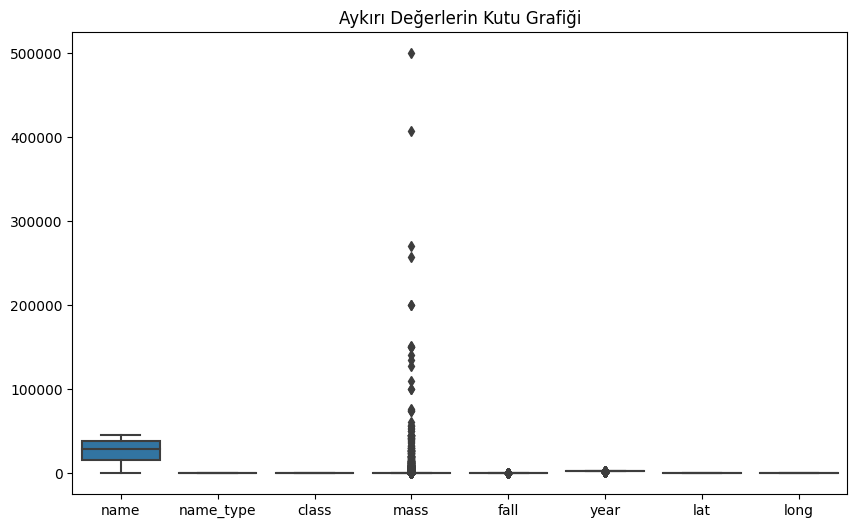

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kutu grafiği oluştur
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Aykırı Değerlerin Kutu Grafiği')
plt.show()

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()

print("Number of Outliers:")
print(outlier_count)

Number of Outliers:
name            0
name_type       0
class           0
mass         1583
fall          131
year          201
lat             0
long            0
dtype: int64


In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [26]:
# Aykırı değerleri belirle
#outliers = (data < lower_bound) | (data > upper_bound)

# Aykırı değerleri veri setinin ortalaması ile doldur
#data = data.where(~outliers, other=data.mean(), axis=0)

In [27]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()

print("Number of Outliers:")
print(outlier_count)

Number of Outliers:
name           0
name_type      0
class          0
mass         977
fall           0
year           0
lat            4
long           0
dtype: int64


array([[<Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'name_type'}>,
        <Axes: title={'center': 'class'}>],
       [<Axes: title={'center': 'mass'}>,
        <Axes: title={'center': 'fall'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>, <Axes: >]], dtype=object)

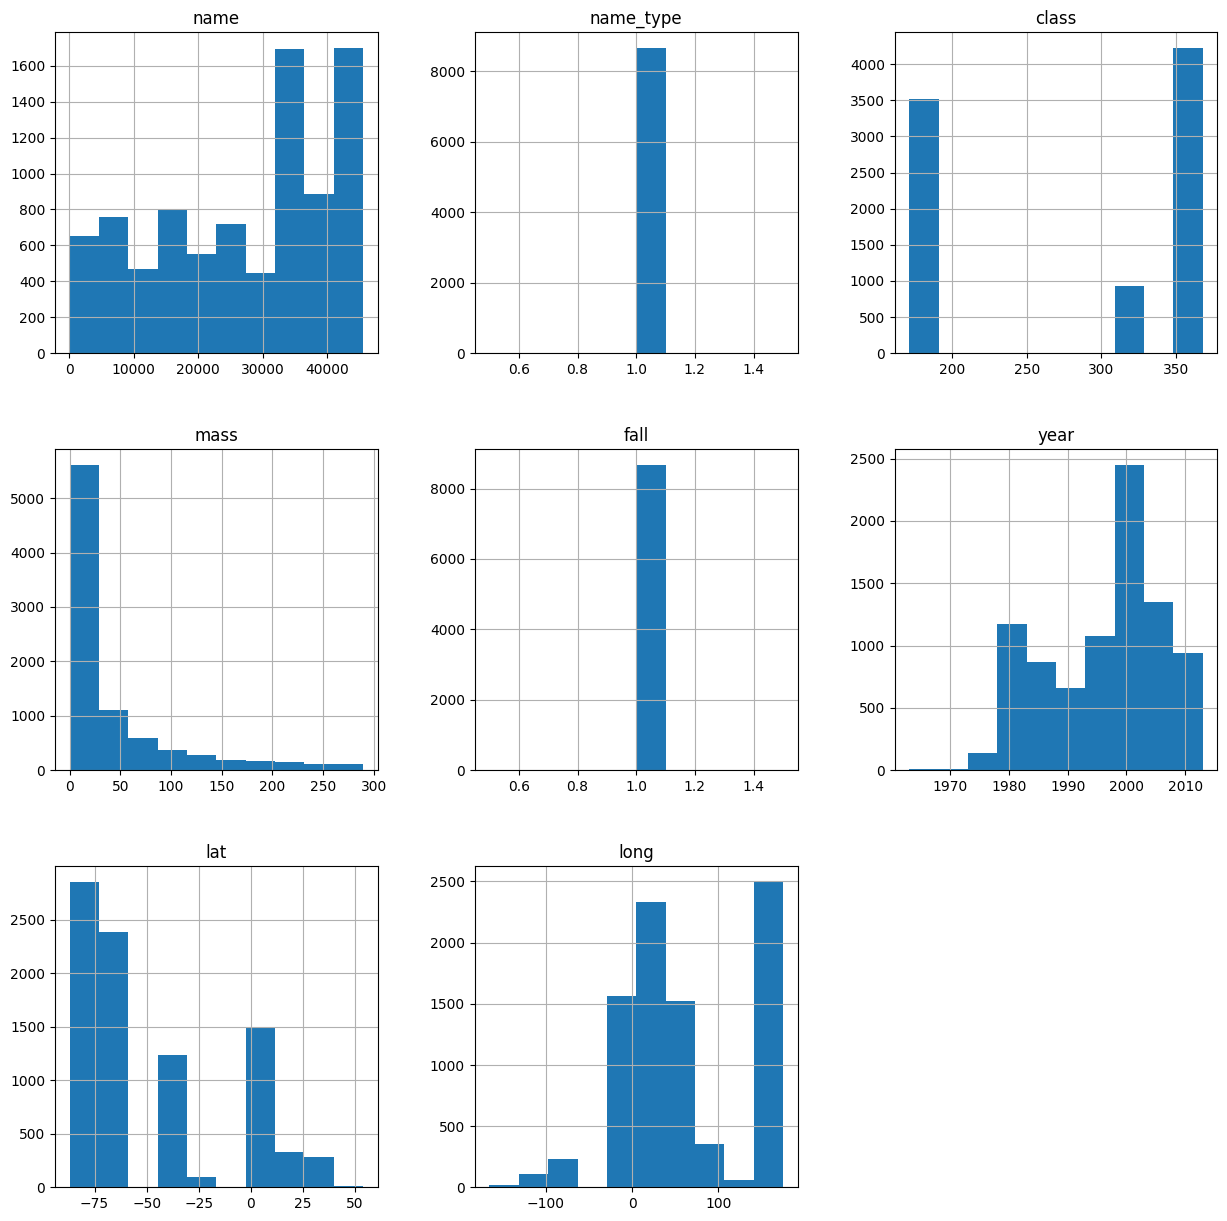

In [28]:
data.hist(figsize=(15,15))

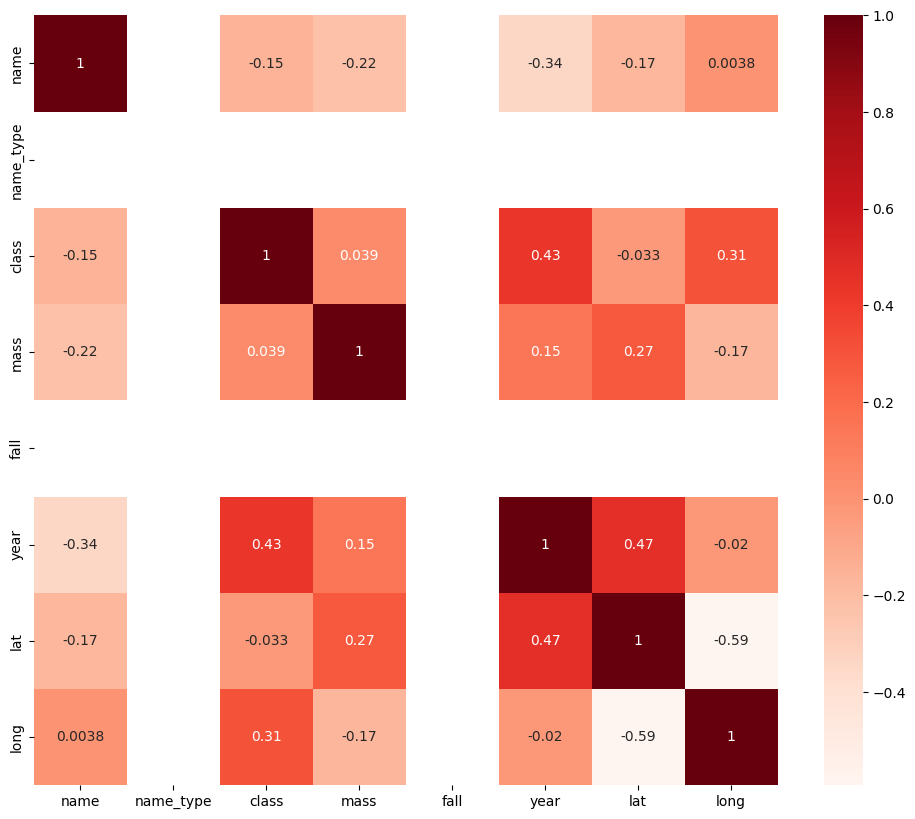

In [29]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show() 

In [30]:
X = data.drop(['class'] , axis = 1)
Y = data['class']
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)

In [31]:
from sklearn.preprocessing import MinMaxScaler 
sc= MinMaxScaler() 
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# LOGICTIC REGRESSION

In [32]:
#Logictic Regresyon
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

LogisticRegression(random_state=0)

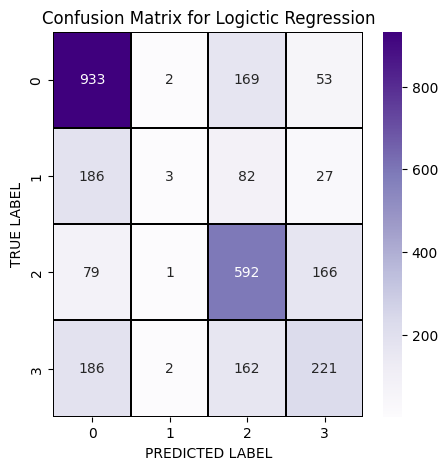

In [33]:
y_pred_lr = logr.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logictic Regression')
plt.show()

In [34]:
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

# Precision
precision_lr = precision_score(y_test, y_pred_lr,  average='weighted')
print(f'Precision: {precision_lr}')

# Recall
recall_lr = recall_score(y_test, y_pred_lr,  average='weighted')
print(f'Recall: {recall_lr}')

# F1-Score
f1_lr = f1_score(y_test, y_pred_lr,  average='weighted')
print(f'F1-Score: {f1_lr}')

Accuracy: 0.6106843575418994
Precision: 0.5780607386856501
Recall: 0.6106843575418994
F1-Score: 0.5715758648802827


# KNN - MINKOWSI

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=7, metric = 'minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

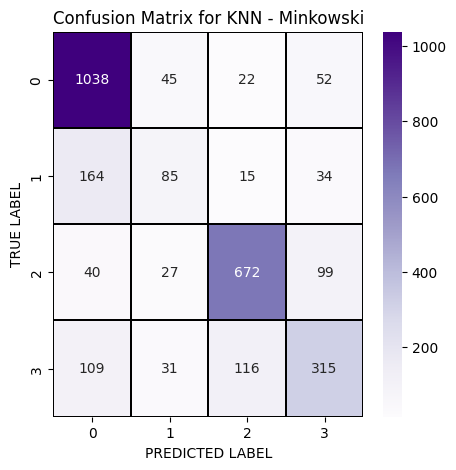

In [37]:
y_pred_knn_mi = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn_mi)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN - Minkowski')
plt.show()

In [38]:
# Accuracy
accuracy_knn_mi = accuracy_score(y_test, y_pred_knn_mi)
print(f'Accuracy: {accuracy_knn_mi}')

# Precision
precision_knn_mi = precision_score(y_test, y_pred_knn_mi,  average='weighted')
print(f'Precision: {precision_knn_mi}')

# Recall
recall_knn_mi = recall_score(y_test, y_pred_knn_mi,  average='weighted')
print(f'Recall: {recall_knn_mi}')

# F1-Score
f1_knn_mi = f1_score(y_test, y_pred_knn_mi,  average='weighted')
print(f'F1-Score: {f1_knn_mi}')

Accuracy: 0.736731843575419
Precision: 0.7213684006331808
Recall: 0.736731843575419
F1-Score: 0.7245399186401257


# KNN - EUCLIDEAN

In [39]:
knn = KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

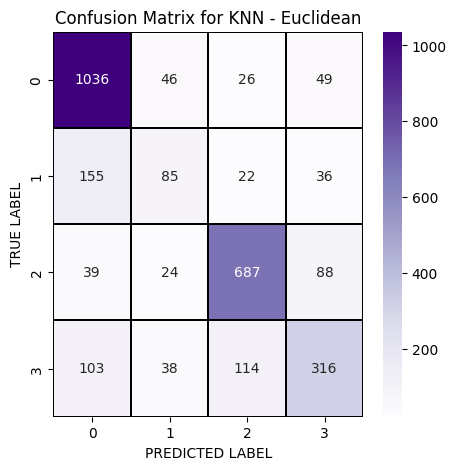

In [40]:
y_pred_knn_e = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn_e)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN - Euclidean')
plt.show()

In [41]:
# Accuracy
accuracy_knn_e = accuracy_score(y_test, y_pred_knn_e)
print(f'Accuracy: {accuracy_knn_e}')

# Precision
precision_knn_e = precision_score(y_test, y_pred_knn_e,  average='weighted')
print(f'Precision: {precision_knn_e}')

# Recall
recall_knn_e = recall_score(y_test, y_pred_knn_e,  average='weighted')
print(f'Recall: {recall_knn_e}')

# F1-Score
f1_knn_e = f1_score(y_test, y_pred_knn_e,  average='weighted')
print(f'F1-Score: {f1_knn_e}')


Accuracy: 0.7416201117318436
Precision: 0.7254001542414028
Recall: 0.7416201117318436
F1-Score: 0.7293699768488623


# KNN - MANHATTAN

In [42]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

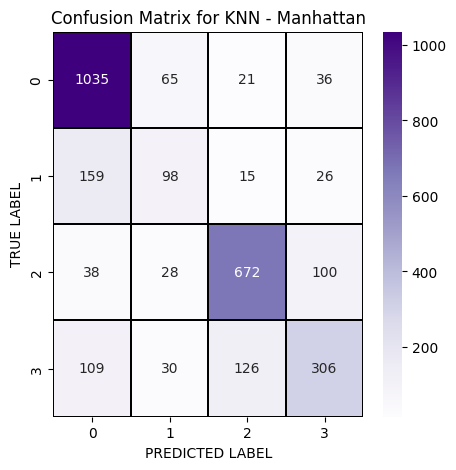

In [43]:
y_pred_knn_ma = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn_ma)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN - Manhattan')
plt.show()

In [44]:
# Accuracy
accuracy_knn_ma = accuracy_score(y_test, y_pred_knn_ma)
print(f'Accuracy: {accuracy_knn_ma}')

# Precision
precision_knn_ma = precision_score(y_test, y_pred_knn_ma,  average='weighted')
print(f'Precision: {precision_knn_ma}')

# Recall
recall_knn_ma = recall_score(y_test, y_pred_knn_ma,  average='weighted')
print(f'Recall: {recall_knn_ma}')

# F1-Score
f1_knn_ma = f1_score(y_test, y_pred_knn_ma,  average='weighted')
print(f'F1-Score: {f1_knn_ma}')

Accuracy: 0.7370810055865922
Precision: 0.7240574542563499
Recall: 0.7370810055865922
F1-Score: 0.7266917256938455


# NAVIE BAYES

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

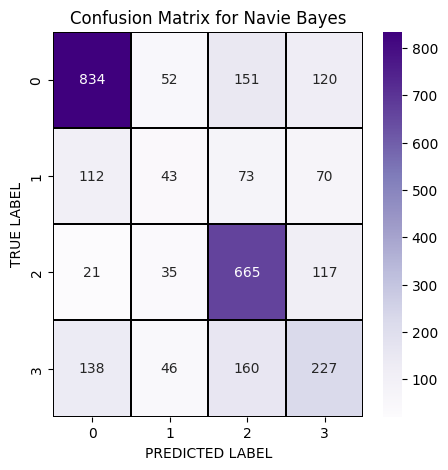

In [46]:
y_pred_nb = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Navie Bayes')
plt.show()

In [47]:
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb}')

# Precision
precision_nb = precision_score(y_test, y_pred_nb,  average='weighted')
print(f'Precision: {precision_nb}')

# Recall
recall_nb = recall_score(y_test, y_pred_nb,  average='weighted')
print(f'Recall: {recall_nb}')

# F1-Score
f1_nb = f1_score(y_test, y_pred_nb,  average='weighted')
print(f'F1-Score: {f1_nb}')

Accuracy: 0.6176675977653632
Precision: 0.6005662070269902
Recall: 0.6176675977653632
F1-Score: 0.604916919966397


# DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

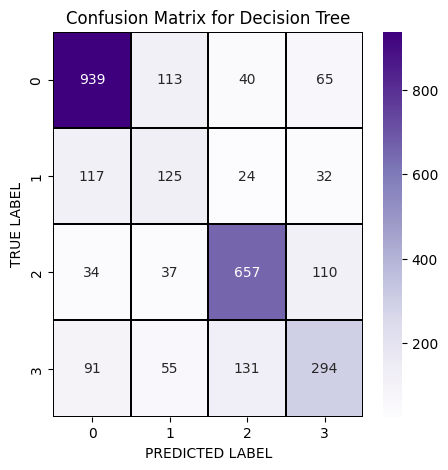

In [49]:
y_pred_dt = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [50]:
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')

# Precision
precision_dt = precision_score(y_test, y_pred_dt,  average='weighted')
print(f'Precision: {precision_dt}')

# Recall
recall_dt = recall_score(y_test, y_pred_dt,  average='weighted')
print(f'Recall: {recall_dt}')

# F1-Score
f1_dt = f1_score(y_test, y_pred_dt,  average='weighted')
print(f'F1-Score: {f1_dt}')

Accuracy: 0.7035614525139665
Precision: 0.7032397778482367
Recall: 0.7035614525139665
F1-Score: 0.7027746938523931


# RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

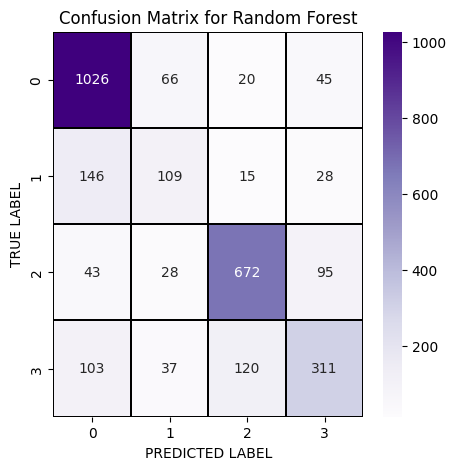

In [52]:
y_pred_rf = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [53]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

# Precision
precision_rf = precision_score(y_test, y_pred_rf,  average='weighted')
print(f'Precision: {precision_rf}')

# Recall
recall_rf = recall_score(y_test, y_pred_rf,  average='weighted')
print(f'Recall: {recall_rf}')

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf,  average='weighted')
print(f'F1-Score: {f1_rf}')


Accuracy: 0.7395251396648045
Precision: 0.7289392354587206
Recall: 0.7395251396648045
F1-Score: 0.7313890623726869


# SVC

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

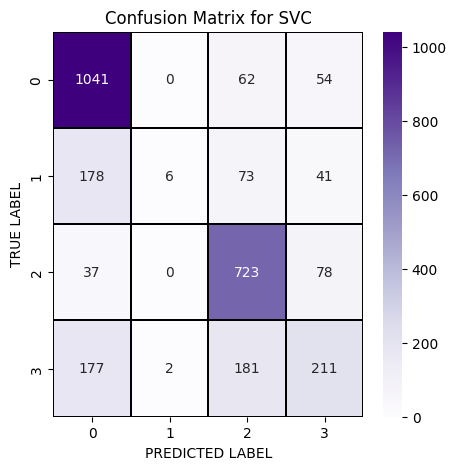

In [55]:
y_pred_svc = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svc)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples")
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVC')
plt.show()

In [56]:
# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy_svc}')

# Precision
precision_svc = precision_score(y_test, y_pred_svc,  average='weighted')
print(f'Precision: {precision_svc}')

# Recall
recall_svc = recall_score(y_test, y_pred_svc,  average='weighted')
print(f'Recall: {recall_svc}')

# F1-Score
f1_svc = f1_score(y_test, y_pred_svc,  average='weighted')
print(f'F1-Score: {f1_svc}')

Accuracy: 0.6916899441340782
Precision: 0.6846664841621374
Recall: 0.6916899441340782
F1-Score: 0.6423347314571546


# RESULTS

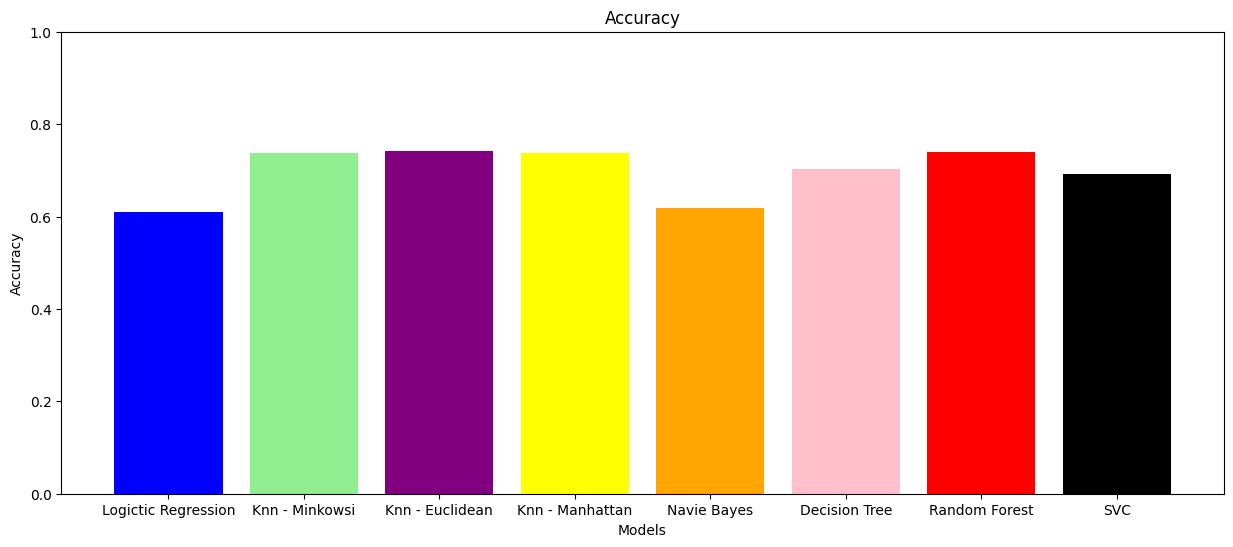

In [57]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn_mi = accuracy_score(y_test, y_pred_knn_mi)
accuracy_knn_e = accuracy_score(y_test, y_pred_knn_e)
accuracy_knn_ma = accuracy_score(y_test, y_pred_knn_ma)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

accuracies = [accuracy_lr, accuracy_knn_mi, accuracy_knn_e, accuracy_knn_ma, accuracy_nb ,accuracy_dt, accuracy_rf, accuracy_svc]
models = ['Logictic Regression', 'Knn - Minkowsi', 'Knn - Euclidean', 'Knn - Manhattan', 'Navie Bayes', 'Decision Tree', 'Random Forest', 'SVC']

plt.figure(figsize=(15, 6)) 
plt.bar(models, accuracies, color=['blue', 'lightgreen', 'purple', 'yellow', 'orange', 'pink', 'red', 'black'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim(0, 1) 
plt.show()

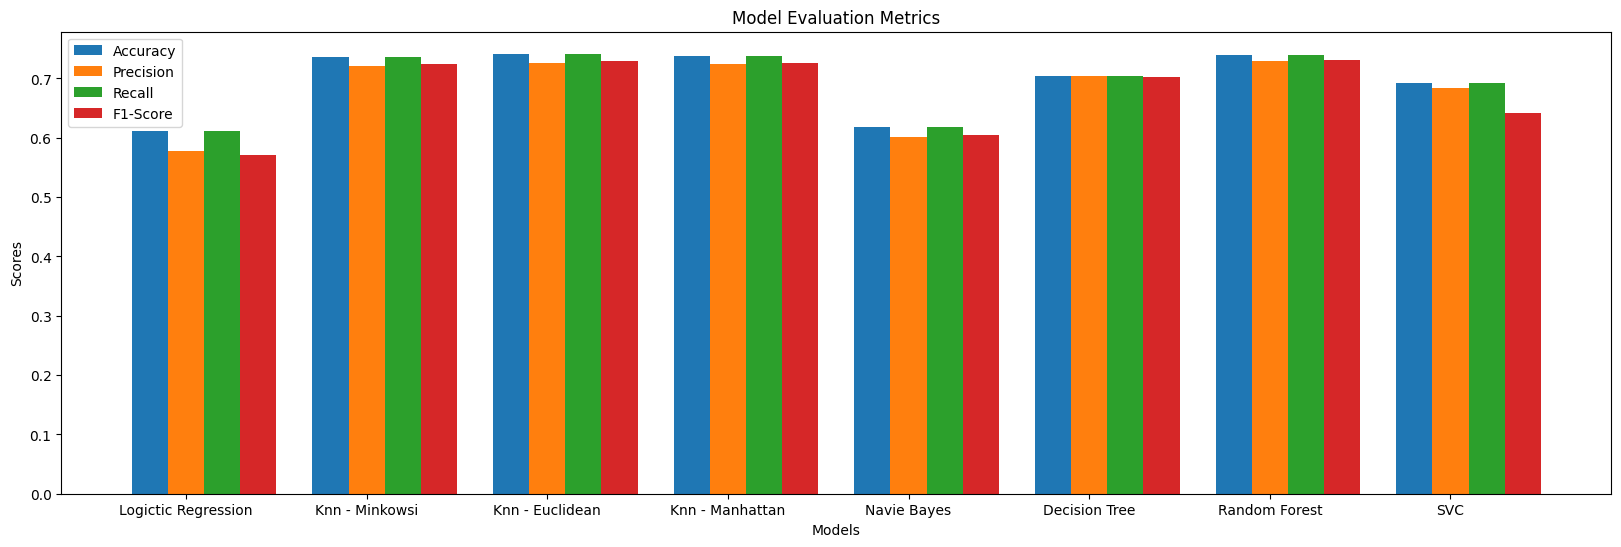

In [58]:
models = ['Logictic Regression', 'Knn - Minkowsi', 'Knn - Euclidean', 'Knn - Manhattan', 'Navie Bayes', 'Decision Tree', 'Random Forest', 'SVC']
accuracy = [accuracy_score(y_test,  y_pred_lr), accuracy_score(y_test, y_pred_knn_mi), accuracy_score(y_test,  y_pred_knn_e),
           accuracy_score(y_test,  y_pred_knn_ma), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test,  y_pred_dt),
           accuracy_score(y_test, y_pred_rf), accuracy_score(y_test,  y_pred_svc)]

precision = [precision_score(y_test, y_pred_lr, average='weighted'), precision_score(y_test, y_pred_knn_mi, average='weighted'), 
             precision_score(y_test, y_pred_knn_e, average='weighted'),precision_score(y_test, y_pred_knn_ma, average='weighted'),
             precision_score(y_test, y_pred_nb, average='weighted'),precision_score(y_test, y_pred_dt, average='weighted'),
             precision_score(y_test, y_pred_rf, average='weighted'),precision_score(y_test, y_pred_svc, average='weighted')]


recall = [recall_score(y_test, y_pred_lr, average='weighted'), recall_score(y_test, y_pred_knn_mi, average='weighted'), 
          recall_score(y_test, y_pred_knn_e, average='weighted'), recall_score(y_test, y_pred_knn_ma, average='weighted'),
          recall_score(y_test, y_pred_nb, average='weighted'), recall_score(y_test, y_pred_dt, average='weighted'),
          recall_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_svc, average='weighted')]

f1 = [f1_score(y_test, y_pred_lr, average='weighted'), f1_score(y_test,  y_pred_knn_mi, average='weighted'), 
      f1_score(y_test, y_pred_knn_e, average='weighted'), f1_score(y_test, y_pred_knn_ma, average='weighted'),
      f1_score(y_test, y_pred_nb, average='weighted'), f1_score(y_test,  y_pred_dt, average='weighted'),
      f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_svc, average='weighted'),]



# Plotting
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(20, 6))

rects1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
rects3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
rects4 = ax.bar(index + 3 * bar_width, f1, bar_width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()
plt.show()

# PCA

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [60]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [61]:
#Logictic Regresyon
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred_lr = logr.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')

# Precision
precision_lr = precision_score(y_test, y_pred_lr,  average='weighted')
print(f'Precision: {precision_lr}')

# Recall
recall_lr = recall_score(y_test, y_pred_lr,  average='weighted')
print(f'Recall: {recall_lr}')

# F1-Score
f1_lr = f1_score(y_test, y_pred_lr,  average='weighted')
print(f'F1-Score: {f1_lr}')

Accuracy: 0.496159217877095
Precision: 0.43638306480329964
Recall: 0.496159217877095
F1-Score: 0.4548712872106488


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
knn = KNeighborsClassifier(n_neighbors=7, metric = 'minkowski')
knn.fit(X_train,y_train)
# Accuracy
accuracy_knn_mi = accuracy_score(y_test, y_pred_knn_mi)
print(f'Accuracy: {accuracy_knn_mi}')

# Precision
precision_knn_mi = precision_score(y_test, y_pred_knn_mi,  average='weighted')
print(f'Precision: {precision_knn_mi}')

# Recall
recall_knn_mi = recall_score(y_test, y_pred_knn_mi,  average='weighted')
print(f'Recall: {recall_knn_mi}')

# F1-Score
f1_knn_mi = f1_score(y_test, y_pred_knn_mi,  average='weighted')
print(f'F1-Score: {f1_knn_mi}')

Accuracy: 0.736731843575419
Precision: 0.7213684006331808
Recall: 0.736731843575419
F1-Score: 0.7245399186401257


In [63]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')
knn.fit(X_train,y_train)
# Accuracy
accuracy_knn_ma = accuracy_score(y_test, y_pred_knn_ma)
print(f'Accuracy: {accuracy_knn_ma}')

# Precision
precision_knn_ma = precision_score(y_test, y_pred_knn_ma,  average='weighted')
print(f'Precision: {precision_knn_ma}')

# Recall
recall_knn_ma = recall_score(y_test, y_pred_knn_ma,  average='weighted')
print(f'Recall: {recall_knn_ma}')

# F1-Score
f1_knn_ma = f1_score(y_test, y_pred_knn_ma,  average='weighted')
print(f'F1-Score: {f1_knn_ma}')

Accuracy: 0.7370810055865922
Precision: 0.7240574542563499
Recall: 0.7370810055865922
F1-Score: 0.7266917256938455


In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb}')

# Precision
precision_nb = precision_score(y_test, y_pred_nb,  average='weighted')
print(f'Precision: {precision_nb}')

# Recall
recall_nb = recall_score(y_test, y_pred_nb,  average='weighted')
print(f'Recall: {recall_nb}')

# F1-Score
f1_nb = f1_score(y_test, y_pred_nb,  average='weighted')
print(f'F1-Score: {f1_nb}')

Accuracy: 0.6176675977653632
Precision: 0.6005662070269902
Recall: 0.6176675977653632
F1-Score: 0.604916919966397


In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')

# Precision
precision_dt = precision_score(y_test, y_pred_dt,  average='weighted')
print(f'Precision: {precision_dt}')

# Recall
recall_dt = recall_score(y_test, y_pred_dt,  average='weighted')
print(f'Recall: {recall_dt}')

# F1-Score
f1_dt = f1_score(y_test, y_pred_dt,  average='weighted')
print(f'F1-Score: {f1_dt}')

Accuracy: 0.7035614525139665
Precision: 0.7032397778482367
Recall: 0.7035614525139665
F1-Score: 0.7027746938523931


In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train, y_train)
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

# Precision
precision_rf = precision_score(y_test, y_pred_rf,  average='weighted')
print(f'Precision: {precision_rf}')

# Recall
recall_rf = recall_score(y_test, y_pred_rf,  average='weighted')
print(f'Recall: {recall_rf}')

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf,  average='weighted')
print(f'F1-Score: {f1_rf}')

Accuracy: 0.7395251396648045
Precision: 0.7289392354587206
Recall: 0.7395251396648045
F1-Score: 0.7313890623726869


In [67]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy_svc}')

# Precision
precision_svc = precision_score(y_test, y_pred_svc,  average='weighted')
print(f'Precision: {precision_svc}')

# Recall
recall_svc = recall_score(y_test, y_pred_svc,  average='weighted')
print(f'Recall: {recall_svc}')

# F1-Score
f1_svc = f1_score(y_test, y_pred_svc,  average='weighted')
print(f'F1-Score: {f1_svc}')

Accuracy: 0.6916899441340782
Precision: 0.6846664841621374
Recall: 0.6916899441340782
F1-Score: 0.6423347314571546


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


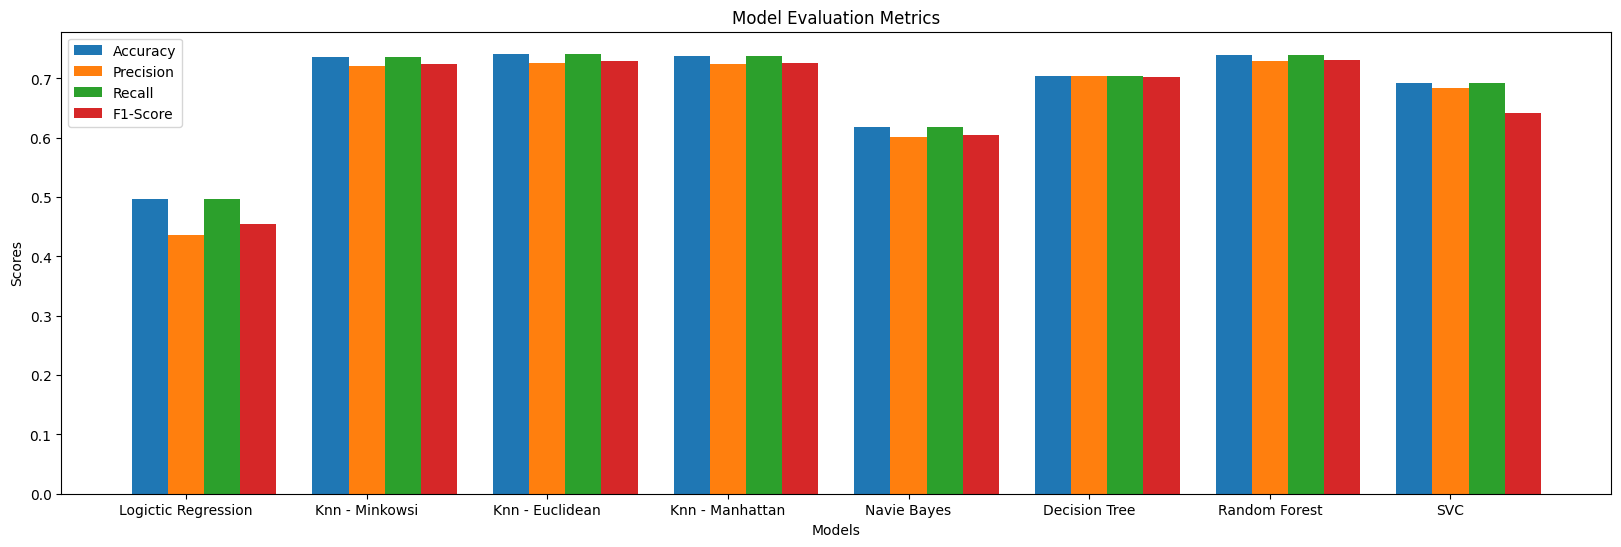

In [68]:
models = ['Logictic Regression', 'Knn - Minkowsi', 'Knn - Euclidean', 'Knn - Manhattan', 'Navie Bayes', 'Decision Tree', 'Random Forest', 'SVC']
accuracy = [accuracy_score(y_test,  y_pred_lr), accuracy_score(y_test, y_pred_knn_mi), accuracy_score(y_test,  y_pred_knn_e),
           accuracy_score(y_test,  y_pred_knn_ma), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test,  y_pred_dt),
           accuracy_score(y_test, y_pred_rf), accuracy_score(y_test,  y_pred_svc)]

precision = [precision_score(y_test, y_pred_lr, average='weighted'), precision_score(y_test, y_pred_knn_mi, average='weighted'), 
             precision_score(y_test, y_pred_knn_e, average='weighted'),precision_score(y_test, y_pred_knn_ma, average='weighted'),
             precision_score(y_test, y_pred_nb, average='weighted'),precision_score(y_test, y_pred_dt, average='weighted'),
             precision_score(y_test, y_pred_rf, average='weighted'),precision_score(y_test, y_pred_svc, average='weighted')]


recall = [recall_score(y_test, y_pred_lr, average='weighted'), recall_score(y_test, y_pred_knn_mi, average='weighted'), 
          recall_score(y_test, y_pred_knn_e, average='weighted'), recall_score(y_test, y_pred_knn_ma, average='weighted'),
          recall_score(y_test, y_pred_nb, average='weighted'), recall_score(y_test, y_pred_dt, average='weighted'),
          recall_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_svc, average='weighted')]

f1 = [f1_score(y_test, y_pred_lr, average='weighted'), f1_score(y_test,  y_pred_knn_mi, average='weighted'), 
      f1_score(y_test, y_pred_knn_e, average='weighted'), f1_score(y_test, y_pred_knn_ma, average='weighted'),
      f1_score(y_test, y_pred_nb, average='weighted'), f1_score(y_test,  y_pred_dt, average='weighted'),
      f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_svc, average='weighted'),]



# Plotting
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(20, 6))

rects1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
rects3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
rects4 = ax.bar(index + 3 * bar_width, f1, bar_width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()
plt.show()